<a href="https://colab.research.google.com/github/BingHungLee/Heat_Transfer/blob/master/Psychrometric_CoolProp_ipynb_(rev_122419).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
[CCWANG TEXTBOOK]
Tdry = 27 C 
Twet = 19.5 C
RH = 0.5(50%)
Tdew = 15.64 C
W = 0.0110835 kg/kg-dry-air
rho = 1.176 kg/m3
i = 55260.2 j/kg
Cp = 1007 j/kg.K
Visc = 1.86594*10^-5 N.s/m2
Pr = 0.708
'''

'''
[HTRI Databank]
Liquid Phase Model: Steam 97
Vapor Phase Model: Steam 97
Bulk liquid-liquid properties: VMG mixing rules
Composition Based: Mass 
Water:Dry Air = 0.0110835:1 = 1.0962:98.903379974

Vapor Properties:
Enthalpy: 323.688 kJ/kg
Density: 1.1685 kg/m3
Viscosity: 0.0173 mN-s/m2
'''

'\nTdry = 27 C \nTwet = 19.5 C\nRH = 0.5(50%)\nTdew = 15.64 C\nW = 0.0110835 kg/kg-dry-air\nrho = 1.176 kg/m3\ni = 55260.2 j/kg\nCp = 1007 j/kg.K\nVisc = 1.86594*10^-5 N.s/m2\nPr = 0.708\n'

In [2]:
pip install CoolProp

     |████████████████████████████████| 4.0MB 2.7MB/s 


In [0]:
from __future__ import print_function
from CoolProp import AbstractState
from CoolProp.CoolProp import PhaseSI, PropsSI, get_global_param_string
import CoolProp.CoolProp as CoolProp
from CoolProp.HumidAirProp import HAPropsSI
from math import sin

In [17]:
# Humid Air Properties
# Reference: http://www.coolprop.org/fluid_properties/HumidAir.html
print("*********** HUMID AIR PROPERTIES *****************")
print("[W] Humidity ratio of 50% rel. hum. air at 300 K, 101325 Pa:", HAPropsSI("W", "T", (27+273.15), "P", 101325, "R", 0.5), "kg_w/kg_da")
print("[RH] Relative humidity from last calculation:", HAPropsSI("R", "T", (27+273.15), "P", 101325, "W", HAPropsSI("W", "T", 300, "P", 101325, "R", 0.5)), "(fractional)")
print("[i] Enthalpy of moist air:", HAPropsSI('H','T',(27+273.15),'P',101325,'R',0.5), "J/kg dry air")
print("[Vha] Mixture volume per unit humid air:", HAPropsSI('Vha','T',(27+273.15),'P',101325,'R',0.5), "m 3 /kg humid air")
print("[Vda] Mixture volume per unit dry air:", HAPropsSI('Vda','T',(27+273.15),'P',101325,'R',0.5), "m 3 /kg dry air")
print("[Visc] Mixture viscosity:", HAPropsSI('Visc','T',(27+273.15),'P',101325,'R',0.5), "Pa-s")
print("[Tdp] Dew-Point Temperature:", HAPropsSI('Tdp','T',(27+273.15),'P',101325,'R',0.5), "K")
print("[cp] Mixture specific heat per unit dry air:", HAPropsSI('cp','T',(27+273.15),'P',101325,'R',0.5), "J/kg dry air/K")
print("[Twb] Wet-Bulb Temperature:", HAPropsSI('Twb','T',(27+273.15),'P',101325,'R',0.5), "K")

*********** HUMID AIR PROPERTIES *****************
[W] Humidity ratio of 50% rel. hum. air at 300 K, 101325 Pa: 0.011195553880081298 kg_w/kg_da
[RH] Relative humidity from last calculation: 0.49561115885190904 (fractional)
[i] Enthalpy of moist air: 55710.86035600604 J/kg dry air
[Vha] Mixture volume per unit humid air: 0.8557081988397269 m 3 /kg humid air
[Vda] Mixture volume per unit dry air: 0.8652883260854642 m 3 /kg dry air
[Visc] Mixture viscosity: 1.8442317457331277e-05 Pa-s
[Tdp] Dew-Point Temperature: 288.8514891717283 K
[cp] Mixture specific heat per unit dry air: 1027.4809083820514 J/kg dry air/K
[Twb] Wet-Bulb Temperature: 292.6784866783496 K


-16
-14
-12
-10
-8
-6
-4
-2
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32


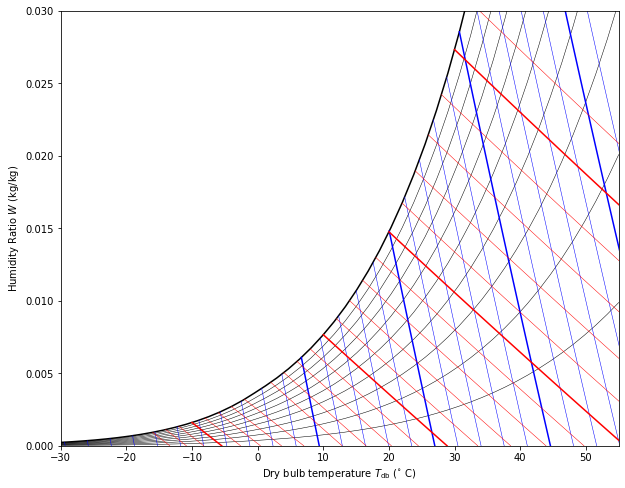

In [10]:
import numpy as np
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10, 8))
Tdbvec = np.linspace(-30, 55)+273.15

# Lines of constant relative humidity
for RH in np.arange(0.1, 1, 0.1):
    W = CP.HAPropsSI("W","R",RH,"P",101325,"T",Tdbvec)
    plt.plot(Tdbvec-273.15, W, color='k', lw = 0.5)

# Saturation curve
W = CP.HAPropsSI("W","R",1,"P",101325,"T",Tdbvec)
plt.plot(Tdbvec-273.15, W, color='k', lw=1.5)

# Lines of constant Vda
for Vda in np.arange(0.69, 0.961, 0.01):
    R = np.linspace(0,1)
    W = CP.HAPropsSI("W","R",R,"P",101325,"Vda",Vda)
    Tdb = CP.HAPropsSI("Tdb","R",R,"P",101325,"Vda",Vda)
    plt.plot(Tdb-273.15, W, color='b', lw=1.5 if abs(Vda % 0.05) < 0.001 else 0.5)

# Lines of constant wetbulb
for Twb_C in np.arange(-16, 33, 2):
    if Twb_C == 0:
        continue
    R = np.linspace(0.0, 1)
    print(Twb_C)
    Tdb = CP.HAPropsSI("Tdb","R",R,"P",101325,"Twb",Twb_C+273.15)
    W = CP.HAPropsSI("W","R",R,"P",101325,"Tdb",Tdb)
    plt.plot(Tdb-273.15, W, color='r', lw=1.5 if abs(Twb_C % 10) < 0.001 else 0.5)

plt.xlabel(r'Dry bulb temperature $T_{\rm db}$ ($^{\circ}$ C)')
plt.ylabel(r'Humidity Ratio $W$ (kg/kg)')
plt.ylim(0, 0.030)
plt.xlim(-30, 55)
plt.show()